# Homework 2

The shooting method which bootstraps a boundary value problem solution by iterating over initial value problems. 

## 1. Quantum Mechanics On The Computer

The time-independent Schrödinger equation for a single particle in one spatial dimension:

\begin{equation}
-\frac{1}{2m}\frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
\end{equation}

As a system of two first order ODEs:

\begin{equation}
\frac{d \phi(x)}{dx} = 2m(V(x)-E)\psi(x)
\end{equation}

\begin{equation}
\frac{d \psi(x)}{dx} = \phi(x)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#RK4 Solver

def RK4_solver(psi_a,d_psi_a,a,b,V,E,m):
    """
    Function solving Schrodinger equation for wave function psi
    
    :param psi_a: float, initial value of psi
    :param d_psi_a: float, initial value of derivative of psi
    :param a: float,lower boundry
    :param b: float,upper boundary
    :param V: function, potential of Schrodinger equation
    :param E: float, energy eigenvalue
    :param m: float, mass
    """

    number_steps = 1000
    x_points = np.linspace(a,b,number_steps)
    print(len(x_points))
    phi_points = np.zeros(len(x_points))
    psi_points = np.zeros(len(x_points))
    h = (b-a)/number_steps #step size

    #initial values

    phi = d_psi_a
    psi = psi_a


    #iteration step 
    for i in range(0, len(x_points)):
        phi_points[i] = phi 
        psi_points[i] = psi
        print(psi_points[i])
        x = x_points[i]

        k1_phi = 2*m *(V(x)- E)* psi
        k1_psi = phi

        k2_phi = 2*m *(V(x+h/2)- E)* (psi +h*k1_psi/2)
        k2_psi = phi + h*k1_phi/2
       
        k3_phi = 2*m *(V(x+h/2)- E)* (psi +h*k2_psi/2)
        k3_psi = phi + h*k2_phi/2
       
        k4_phi = 2*m *(V(x+h)- E)* (psi +h*k3_psi)
        k4_psi = phi + h*k3_phi

        phi += h * (k1_phi + 2*k2_phi +2*k3_phi + k4_phi)/6
        psi += h * (k1_psi + 2*k2_psi +2*k3_psi + k4_psi)/6
        
    return x_points,phi_points,psi_points

Free particle $V(x)=0$

In [6]:
def V1(x):
    return 0.0

In [23]:
m=1
E=1
psi_a = 0
d_psi_a =1
X,dP,P = RK4_solver(psi_a,d_psi_a,0,10,V1,E,m)
#RK4_solver(psi_a,d_psi_a,0,10,V1,E,m)

1000
0.0
0.009999666666666667
0.019997333433332223
0.029991000799970004
0.039978670066420016
0.04995834373212231
0.05992802589561043
0.06988572265368506
0.07982944250018803
0.08975719672429687
0.09966699980826037
0.10955686982449553
0.11942482883196642
0.12926890327176585
0.13908712436182055
0.14887752849064098
0.1586381576100372
0.16836705962672177
0.17806228879272218
0.18772190609452372
0.1973439796408658
0.20692658504911385
0.21646780583012928
0.22596573377156104
0.23541846931948163
0.24482412195829167
0.25418081058881664
0.2634866639045204
0.27273982076576037
0.2819384305720092
0.29108065363196867
0.30016466153150195
0.30918863749931014
0.3181507767702806
0.3270492869464339
0.33588238835539763
0.3446483144063346
0.3533453119432553
0.3619716415956433
0.37052557812632364
0.3790054107765042
0.38740944360792195
0.39573599584202507
0.4039834021961228
0.4121500132164366
0.42023419560798536
0.428234332561239
0.43614882407547484
0.4439760872787726
0.45171455674458333
0.4593626848048097
0.4

In [24]:
RK4_solver(psi_a,d_psi_a,0,10,V1,E,m)

1000
0.0
0.009999666666666667
0.019997333433332223
0.029991000799970004
0.039978670066420016
0.04995834373212231
0.05992802589561043
0.06988572265368506
0.07982944250018803
0.08975719672429687
0.09966699980826037
0.10955686982449553
0.11942482883196642
0.12926890327176585
0.13908712436182055
0.14887752849064098
0.1586381576100372
0.16836705962672177
0.17806228879272218
0.18772190609452372
0.1973439796408658
0.20692658504911385
0.21646780583012928
0.22596573377156104
0.23541846931948163
0.24482412195829167
0.25418081058881664
0.2634866639045204
0.27273982076576037
0.2819384305720092
0.29108065363196867
0.30016466153150195
0.30918863749931014
0.3181507767702806
0.3270492869464339
0.33588238835539763
0.3446483144063346
0.3533453119432553
0.3619716415956433
0.37052557812632364
0.3790054107765042
0.38740944360792195
0.39573599584202507
0.4039834021961228
0.4121500132164366
0.42023419560798536
0.428234332561239
0.43614882407547484
0.4439760872787726
0.45171455674458333
0.4593626848048097
0.4

(array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
         0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
         0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
         0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
         0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
         0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
         0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
         0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
         0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
         0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
         0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
         0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
         0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
         0.65065065,  0.66066066,  0.67067067,  0.6

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_5807/1087883179.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X,P, label = "$\psi(x)$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_5807/1087883179.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")


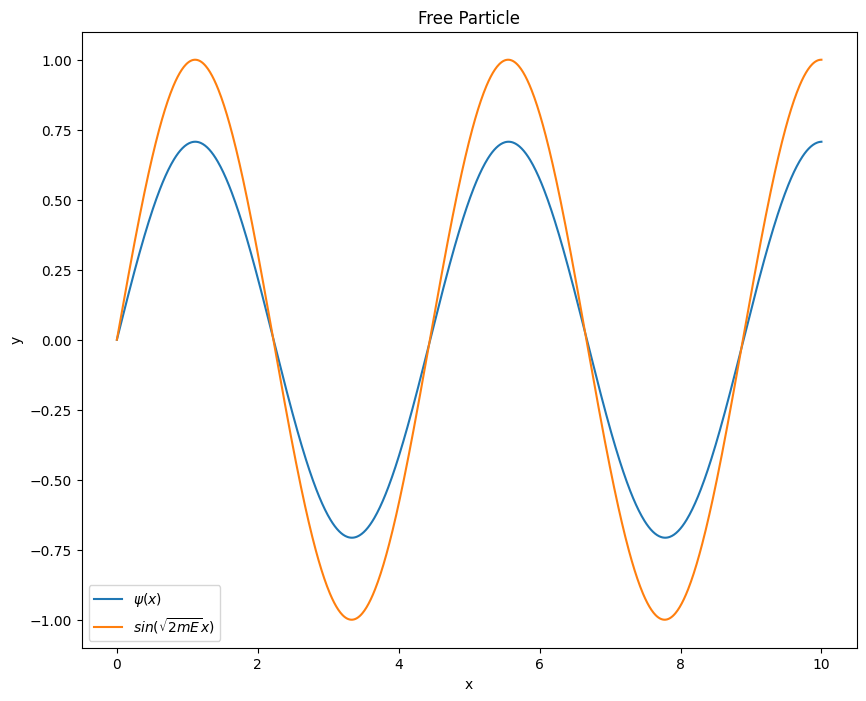

In [31]:
fig,ax = plt.subplots(figsize=(10, 8))
Y = np.sin(np.sqrt(2) * X)
ax.plot(X,P, label = "$\psi(x)$")
ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Free Particle")
ax.legend()
plt.savefig("free_partical.png")
plt.show()

Harmonic Oscillator $V(x)=m\omega^2 x^2/2 $